In [3]:
# create a dataframe with all the json in the current folder
import pandas as pd
import os
import json

data_list = []

json_files = [pos_json for pos_json in os.listdir() if pos_json.endswith('.json')]
for js in json_files:
    with open(js) as json_file:
        data = json.load(json_file)
        data_list.append(data)

df = pd.DataFrame(data_list)
print(df.head())

  symbol                 date     open     high      low    close volume
0    ETH  2025-03-06 17:05:00  20.8800  20.8800  20.8800  20.8800     25
1    BTC  2025-03-06 17:05:00  40.1265  40.1300  39.9900  40.1100   2418
2    ETH  2025-03-06 12:35:00  20.7800  20.7800  20.5900  20.6700  18760
3    BTC  2025-03-06 13:20:00  39.3150  39.3851  39.3150  39.3600   3398
4    ETH  2025-03-06 14:00:00  20.7200  20.7500  20.6500  20.6800  11537


In [9]:
# Convert the 'date' column to datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)  # Set 'date' as the index

for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass  # Ignore columns that cannot be converted

In [12]:
df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2025-03-06 17:05:00,ETH,20.8800,20.8800,20.880,20.88,25
2025-03-06 17:05:00,BTC,40.1265,40.1300,39.990,40.11,2418
2025-03-06 12:35:00,ETH,20.7800,20.7800,20.590,20.67,18760
2025-03-06 13:20:00,BTC,39.3150,39.3851,39.315,39.36,3398
2025-03-06 14:00:00,ETH,20.7200,20.7500,20.650,20.68,11537


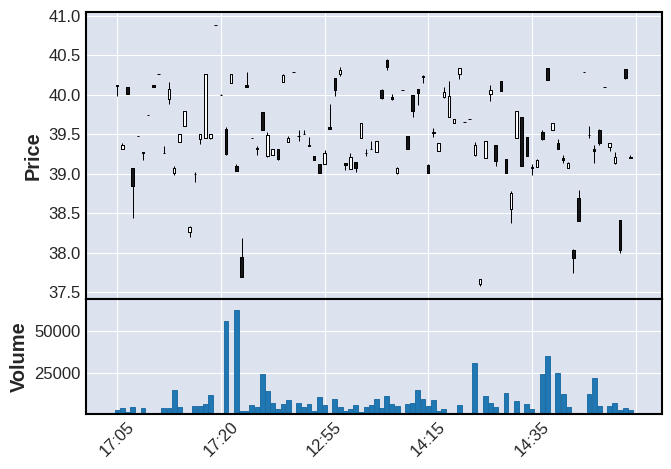

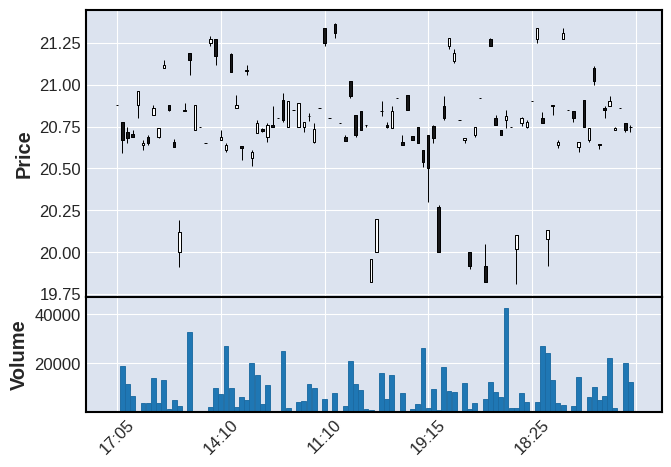

In [16]:
import mplfinance as mpf
mpf.plot(df[df["symbol"] == "BTC"], type='candle', volume=True)
mpf.plot(df[df["symbol"] == "ETH"], type='candle', volume=True)

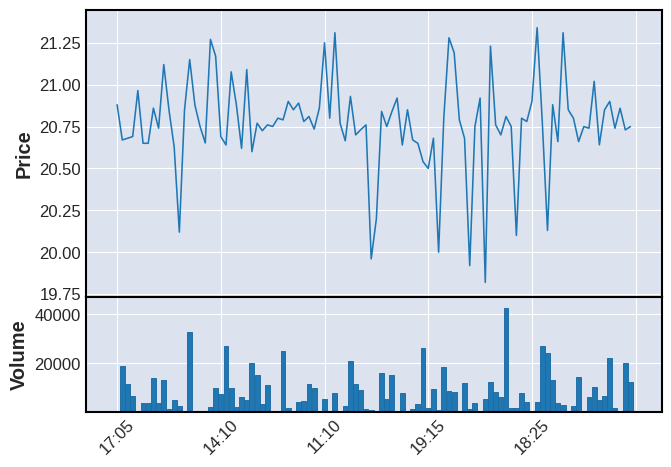

In [17]:
mpf.plot(df[df["symbol"] == "ETH"], type='line', volume=True)

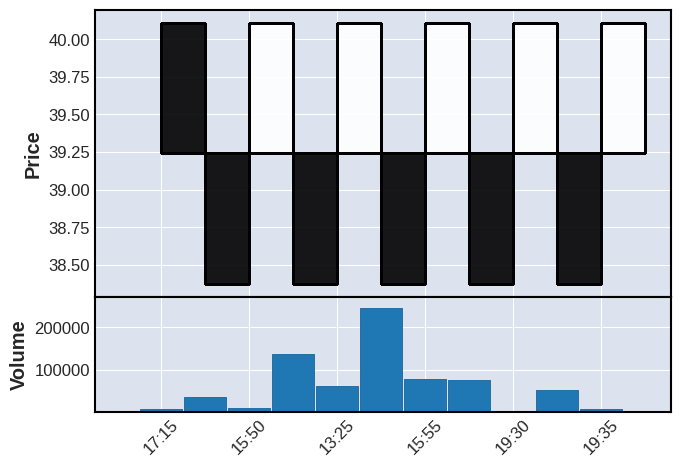

In [18]:
mpf.plot(df[df["symbol"] == "BTC"], type='renko', volume=True)

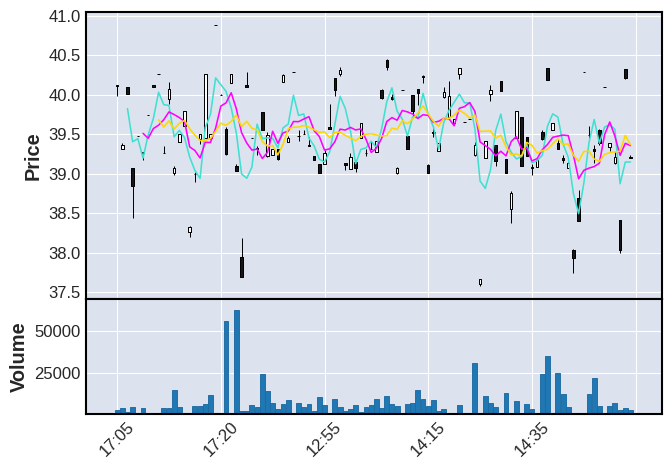

In [19]:
mpf.plot(df[df["symbol"] == "BTC"],type='candle',mav=(3,6,9),volume=True)